In [1]:
import numpy as np
from urllib.request import urlopen
import scipy.optimize
import random
from sklearn import svm
from sklearn import linear_model
import gzip
import ast
import demjson

def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

def parseData(fname):
  for l in open(fname):
    yield eval(l)

print("Reading data...")
# Download from http://cseweb.ucsd.edu/classes/fa19/cse258-a/data/beer_50000.json
#data = list(parseData("fantasy_10000.json.gz"))

def readData1(path):
    x = gzip.open(path)
    for l in x:
        yield demjson.decode(l)

dataset = []

for l in readData1('C:/Users/brand/Desktop/fantasy_10000.json.gz'):
    dataset.append(l)
    
print('done')

Reading data...


In [17]:
from sklearn.linear_model import LinearRegression

def features(obs):
    review_len = len(obs['review_text'])
    feature = [review_len]
    
    return feature 

X = [features(d) for d in dataset]

Y = [d['rating'] for d in dataset]

reg = LinearRegression().fit(X,Y)

#reg.score(X,Y)

print(reg.coef_)
print(reg.intercept_)

#theta0 = 3.686
#theta1 = .6874 e-05

y_pred = reg.predict(X)

sse = sum([x**2 for x in (Y - y_pred)])
print("Sse value: " + str(sse))


mse = sse/len(Y)
print("MSE value: " + str(mse))


fvu = mse/np.var(Y)
r2 = 1 - fvu
print("R squared value: " + str(r2))

print(reg.score(X,Y))

[6.87371675e-05]
3.685681355016952
Sse value: 15522.08662235535
MSE value: 1.5522086622355349
R squared value: 0.0031745955412257887
0.0031745955412239013


In [90]:
import dateutil.parser
import sklearn.preprocessing



def one_hot_encoder(value, numb):
    lst = np.zeros(numb, dtype=int)
    if value >= numb:
        return lst
    
    else:
        lst[value] = 1
    
    return lst
    


def features2(obs):
    lst = []
    lst.append(len(obs['review_text']))
    lst = np.array(lst)
    t = dateutil.parser.parse(obs['date_added'])
    day = t.weekday()
    day2 = one_hot_encoder(day,6)
    year = t.year
    year2 = one_hot_encoder(year-2006,11)
    feature = np.concatenate((lst,day2))
    feature2 = np.concatenate((feature,year2))
    
   
    
    return feature2


X2 = [features2(d) for d in dataset]

Y = [d['rating'] for d in dataset]

print(X2[0])
print(X2[1])
print(X2[2])
print(X2[3])

years = []

for i in dataset:
    t = dateutil.parser.parse(i['date_added'])
    years.append(t.year)

print(max(years), min(years))



[2086    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[1521    0    0    1    0    0    0    0    0    0    0    0    0    0
    0    1    0    0]
[1519    0    0    0    0    0    1    0    0    0    0    0    0    0
    0    1    0    0]
[1791    0    1    0    0    0    0    0    0    0    0    0    0    1
    0    0    0    0]
2017 2006


In [95]:
reg2 = LinearRegression().fit(X2,Y)

#reg.score(X,Y)

print(reg.coef_)
print(reg.intercept_)

#theta0 = ....


y_pred2 = reg2.predict(X2)

sse2 = sum([x**2 for x in (Y - y_pred2)])
print("Sse value: " + str(sse2))


mse2 = sse2/len(Y)
print("MSE value: " + str(mse2))


fvu2 = mse2/np.var(Y)
r22 = 1 - fvu2
print("R squared value: " + str(r22))

print(reg2.score(X2,Y))

[ 5.15709386e-05 -1.02846903e-01 -5.39465593e-02  4.28628944e-02
  3.79949935e-03  2.33214129e-02 -6.45051374e-02  1.23331225e+00
 -3.49135580e-01 -4.71161916e-01 -4.49848314e-01 -4.36926796e-01
 -3.95457762e-01  3.37452018e-02  1.28864086e-01  1.41688638e-01
  2.46987133e-02 -3.16261788e-03]
3.741249443893825
Sse value: 15123.578656428259
MSE value: 1.5123578656428258
R squared value: 0.028766700132575984
0.028766700132579537


In [106]:
X_train = X2[0:5000]
X_test = X2[5000:]
Y_train = Y[0:5000]
Y_test = Y[5000:]

reg3 = LinearRegression().fit(X_train,Y_train)

#reg.score(X,Y)

print(reg3.coef_)
print(reg3.intercept_)

#theta0 = ....


y_pred3 = reg3.predict(X_test)
y_predtrain = reg3.predict(X_train)

sse3 = sum([x**2 for x in (Y_test - y_pred3)])
print("Sse value on test set: " + str(sse3))

ssetrain = sum([x**2 for x in (Y_train - y_predtrain)])
print("Sse value on train set: " + str(ssetrain))


mse3 = sse3/len(Y_test)
print("MSE value on test set: " + str(mse3))

msetrain = ssetrain/len(Y_train)
print("MSE value on train set: " + str(msetrain))


#fvu3 = mse3/np.var(Y_test)
#r23 = 1 - fvu3
#print("R squared value: " + str(r23))



[ 9.49609324e-05 -8.80368162e-02 -5.46549635e-02  8.00866057e-02
  6.37678470e-02  1.12167502e-02 -7.35092799e-02  1.22496269e+00
  8.18439941e-02  1.34707568e-01 -1.15313297e-01 -4.53081775e-01
 -4.54220284e-01  7.74288019e-02  2.58825893e-01  1.59453915e-01
 -1.34961867e-03  6.42201556e-02]
3.683515741140291
Sse value on test set: 8201.205573099032
Sse value on train set: 7200.746471339537
MSE value on test set: 1.6402411146198064
MSE value on train set: 1.4401492942679073


In [124]:
"""Task 2 - Classification """

def parseDataFromURL(fname):
    for l in urlopen(fname):
        yield eval(l)

print('Loading data')

data = list(parseDataFromURL("https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/beer_50000.json"))

print('done')

y = [d['review/overall'] >= 4 for d in data]
y = np.array(y)*1

print(len(y))

Loading data
done
[0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1]
50000


In [133]:
from sklearn.linear_model import LogisticRegression

def features(obs):
    review_len = len(obs['review/text'])
    feature = [review_len]
    
    return feature 

X = [features(d) for d in data]

clf = LogisticRegression(class_weight='balanced').fit(X,y)

preds = clf.predict(X)

print(preds)

TP = sum([(p and l) for (p,l) in zip(preds,y)])
FP = sum([(p and not l) for (p,l) in zip(preds,y)])
TN = sum([(not p and not l) for (p,l) in zip(preds,y)])
FN = sum([(not p and l) for (p,l) in zip(preds,y)])

TPR = TP / (TP+FN)
TNR = TN / (TN + FP)

print("True positive rate: "  + str(TP/(TP+FN)))
print("True negative rate: " + str(TN/(TN + FP)))

print("Balanced error rate: " + str(1 - .5 * (TPR + TNR)))

[0 0 0 ... 0 1 0]
True positive rate: 0.4224979174104487
True negative rate: 0.6408957773980962
Balanced error rate: 0.4683031525957275


In [143]:
import matplotlib.pyplot as plt

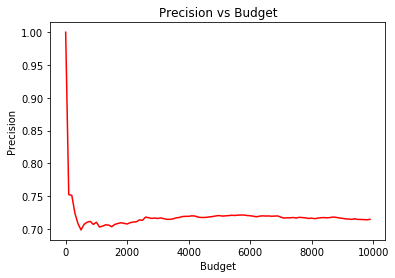

In [172]:
probs = clf.predict_proba(X)

probY = list(zip([p[1] for p in probs], [p[1] > 0.5 for p in probs] , y))

probY.sort(reverse=True)
yPR = []
axis = []

for i in range(1,10000,100):
    preds = [x[1] for x in probY[:i]]
    labs = [x[2] for x in probY[:i]]
    prec = sum(labs) / len(labs)
    yPR.append(prec)
    axis.append(i)



plt.plot(axis,yPR, color='r')
plt.xlabel('Budget')
plt.ylabel('Precision')
plt.plot()
plt.title("Precision vs Budget")
plt.show()


(0.8053703769809528, True, 1)
(0.19462962301904718, True, 1, 0.8053703769809528)
Precision with budget = 1: 1
[1, 1, 1, 1, 1, 1, 1, 1]
Precision with budget = 10: 0.8
Precision with budget = 10000: 0.6208


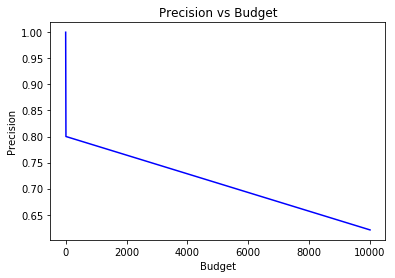

In [200]:
"""k = 1"""
probY.sort(reverse=True)
print(probY[0])

def confidence(numb):
    """Find confidence levels of prediction from logistic regression
    Numbers close to zero have high confidence of correct classification 
    Numbers close to .5 have low confidence 
    """
    if numb > .5:
        return 1 - numb

    else:
        return numb

    
#add confidence to tuples
probz = list(zip([p[1] for p in probs], [p[1] > 0.5 for p in probs] , y, [confidence(p[1]) for p in probs]))
probyy = list(zip([confidence(p[1]) for p in probs], [p[1] > 0.5 for p in probs] , y, [p[1] for p in probs]))
probyy.sort(reverse=False)

"""Precision values for budget levels of 1, 10, 10000"""

print(probyy[0])
print("Precision with budget = 1: 1")



lb = [x[2] for x in probyy[0:10]]
pd = [x[1] for x in probyy[0:10]]
pd = np.array(pd) * 1
correct = []

for i in range(len(lb)):
    if pd[i] == lb[i]:
        correct.append(1)
    
print(correct)


precision = sum(correct) / len(lb)
print("Precision with budget = 10: " + str(precision))

lb10000 = [x[2] for x in probyy[0:10000]]
pd10000 = [x[1] for x in probyy[0:10000]]
pd10000 = np.array(pd10000) * 1

correct2 = []

for i in range(len(lb10000)):
    if pd10000[i] == lb10000[i]:
        correct2.append(1)

precision10000 = sum(correct2) / len(lb10000)
print("Precision with budget = 10000: " + str(precision10000))

xaxis = [1,10,10000]
yaxis = [1, .8, precision10000]

plt.plot(xaxis,yaxis, color='b')
plt.xlabel('Budget')
plt.ylabel('Precision')
plt.plot()
plt.title("Precision vs Budget")
plt.show()

        